### Recipes 5k

* [Dataset](http://www.ub.edu/cvub/recipes5k/)

* [Original Paper](https://www.researchgate.net/publication/318729535_Food_Ingredients_Recognition_through_Multi-label_Learning)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import process_labels, split_data
from src.classifiers_base import preprocess_df

from transformers import BertTokenizer

from src.multimodal_data_loader import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_base import train_early_fusion, train_late_fusion

In [2]:
PATH = 'datasets/Recipes5k/'

In [3]:
text_path = os.path.join(PATH, 'labels.csv')
images_path = os.path.join(PATH, 'images')

## Get data

In [4]:
df = pd.read_csv(text_path)
df

,image,class,split,ingredients
0,onion_rings/0_einkorn_onion_rings_hostedLargeU...,onion_rings,val,"yellow onion,flour,baking powder,seasoning sal..."
1,onion_rings/1_crispy_onion_rings_hostedLargeUr...,onion_rings,train,"white onion,panko,cornmeal,ground paprika,onio..."
2,onion_rings/2_onion_rings_hostedLargeUrl.jpg,onion_rings,train,"yellow onion,all-purpose flour,baking powder,l..."
3,onion_rings/3_onion_rings_hostedLargeUrl.jpg,onion_rings,train,"oil,pancake mix,spanish onion"
4,onion_rings/4_onion_rings_hostedLargeUrl.jpg,onion_rings,train,"peanut oil,sweet onion,flour,eggs,celery salt,..."
...,...,...,...,...
4821,chocolate_ice_cream/45_chocolate_ice_cream_hos...,chocolate_ice_cream,train,"dark chocolate,whole milk,unsweetened cocoa po..."
4822,chocolate_ice_cream/46_dark_chocolate_ice_crea...,chocolate_ice_cream,train,"half & half,whole milk,heavy cream,sugar,sea s..."
4823,chocolate_ice_cream/47_the_darkest_chocolate_i...,chocolate_ice_cream,train,"unsweetened cocoa powder,brewed coffee,granula..."
4824,chocolate_ice_cream/48_homemade_chocolate_ice_...,chocolate_ice_cream,train,"unsweetened cocoa powder,sugar,firmly packed b..."


## Data Perparation

In [5]:
# Select features and labels vectors
text_columns = 'ingredients'
image_columns = 'image'
label_columns = 'class'

df = preprocess_df(df, image_columns, images_path)

# Split the data
train_df, test_df = split_data(df)

# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)

Train Shape: (3409, 4)
Test Shape: (783, 4)


In [6]:
# Instantiate tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [7]:
train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns, tokenizer)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

### Models

In [8]:
output_size = len(mlb.classes_)
multilabel = False

Training Early Fusion Model:
The number of parameters of the model are: 196081509
Epoch 1/15 - Test Accuracy: 0.0102
Epoch 2/15 - Test Accuracy: 0.0294
Epoch 3/15 - Test Accuracy: 0.0460
Epoch 4/15 - Test Accuracy: 0.0524
Epoch 5/15 - Test Accuracy: 0.0690
Epoch 6/15 - Test Accuracy: 0.0792
Epoch 7/15 - Test Accuracy: 0.1162
Epoch 8/15 - Test Accuracy: 0.1315
Epoch 9/15 - Test Accuracy: 0.1290
Epoch 10/15 - Test Accuracy: 0.1315
Epoch 11/15 - Test Accuracy: 0.1507
Epoch 12/15 - Test Accuracy: 0.1775
Epoch 13/15 - Test Accuracy: 0.1839
Epoch 14/15 - Test Accuracy: 0.1980
Epoch 15/15 - Test Accuracy: 0.1686


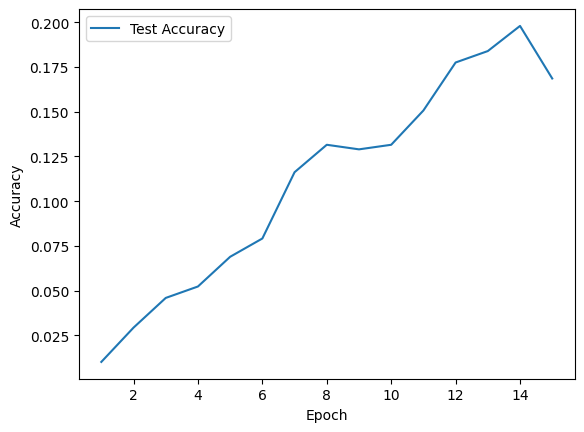

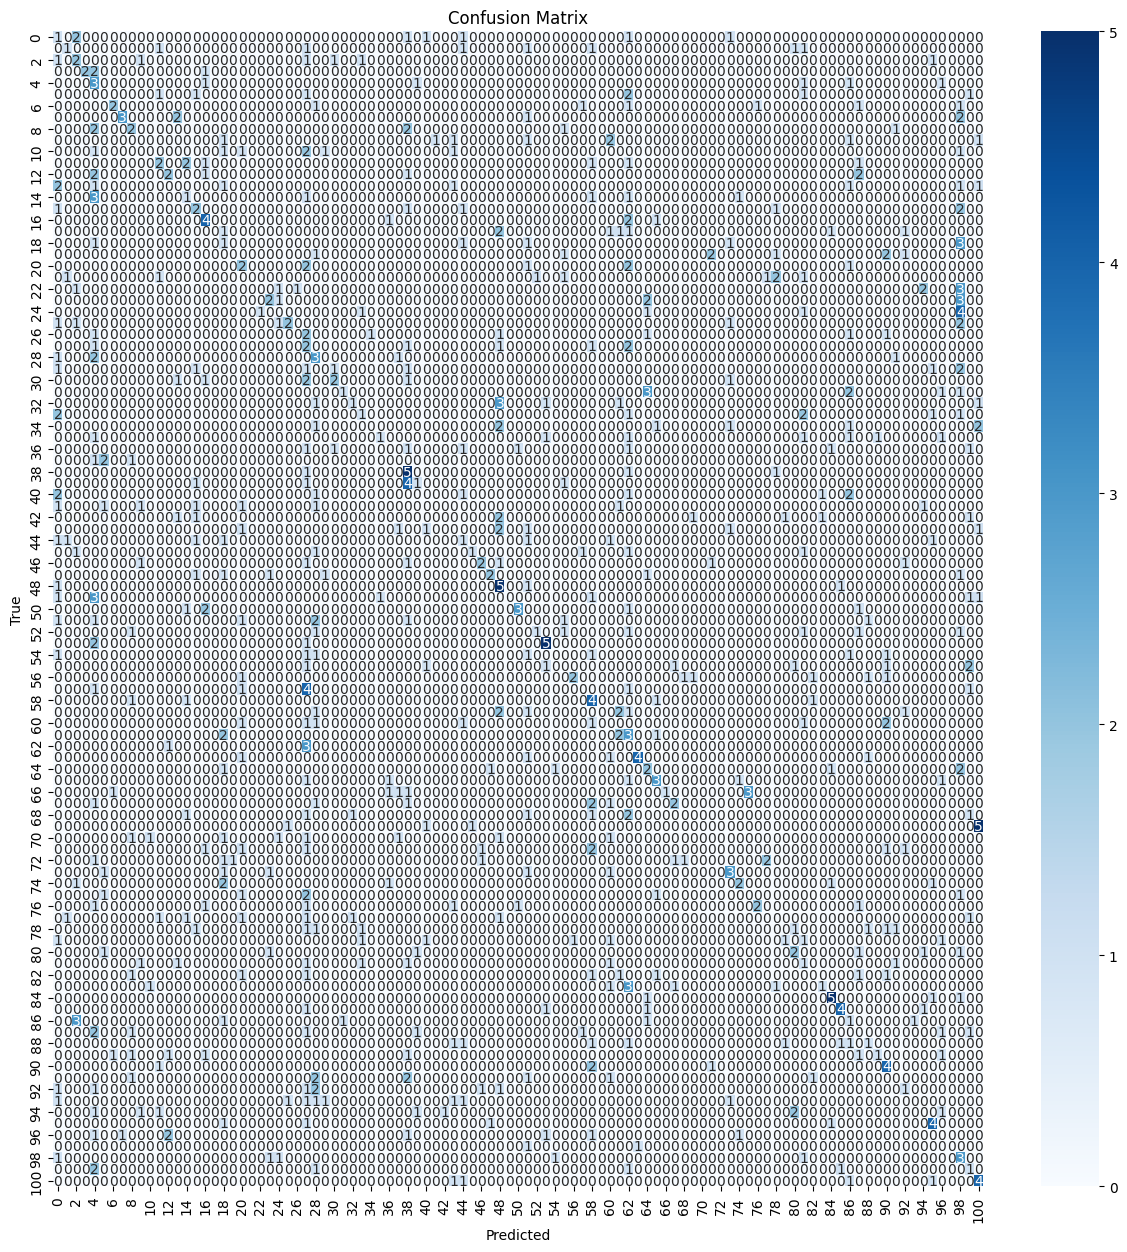

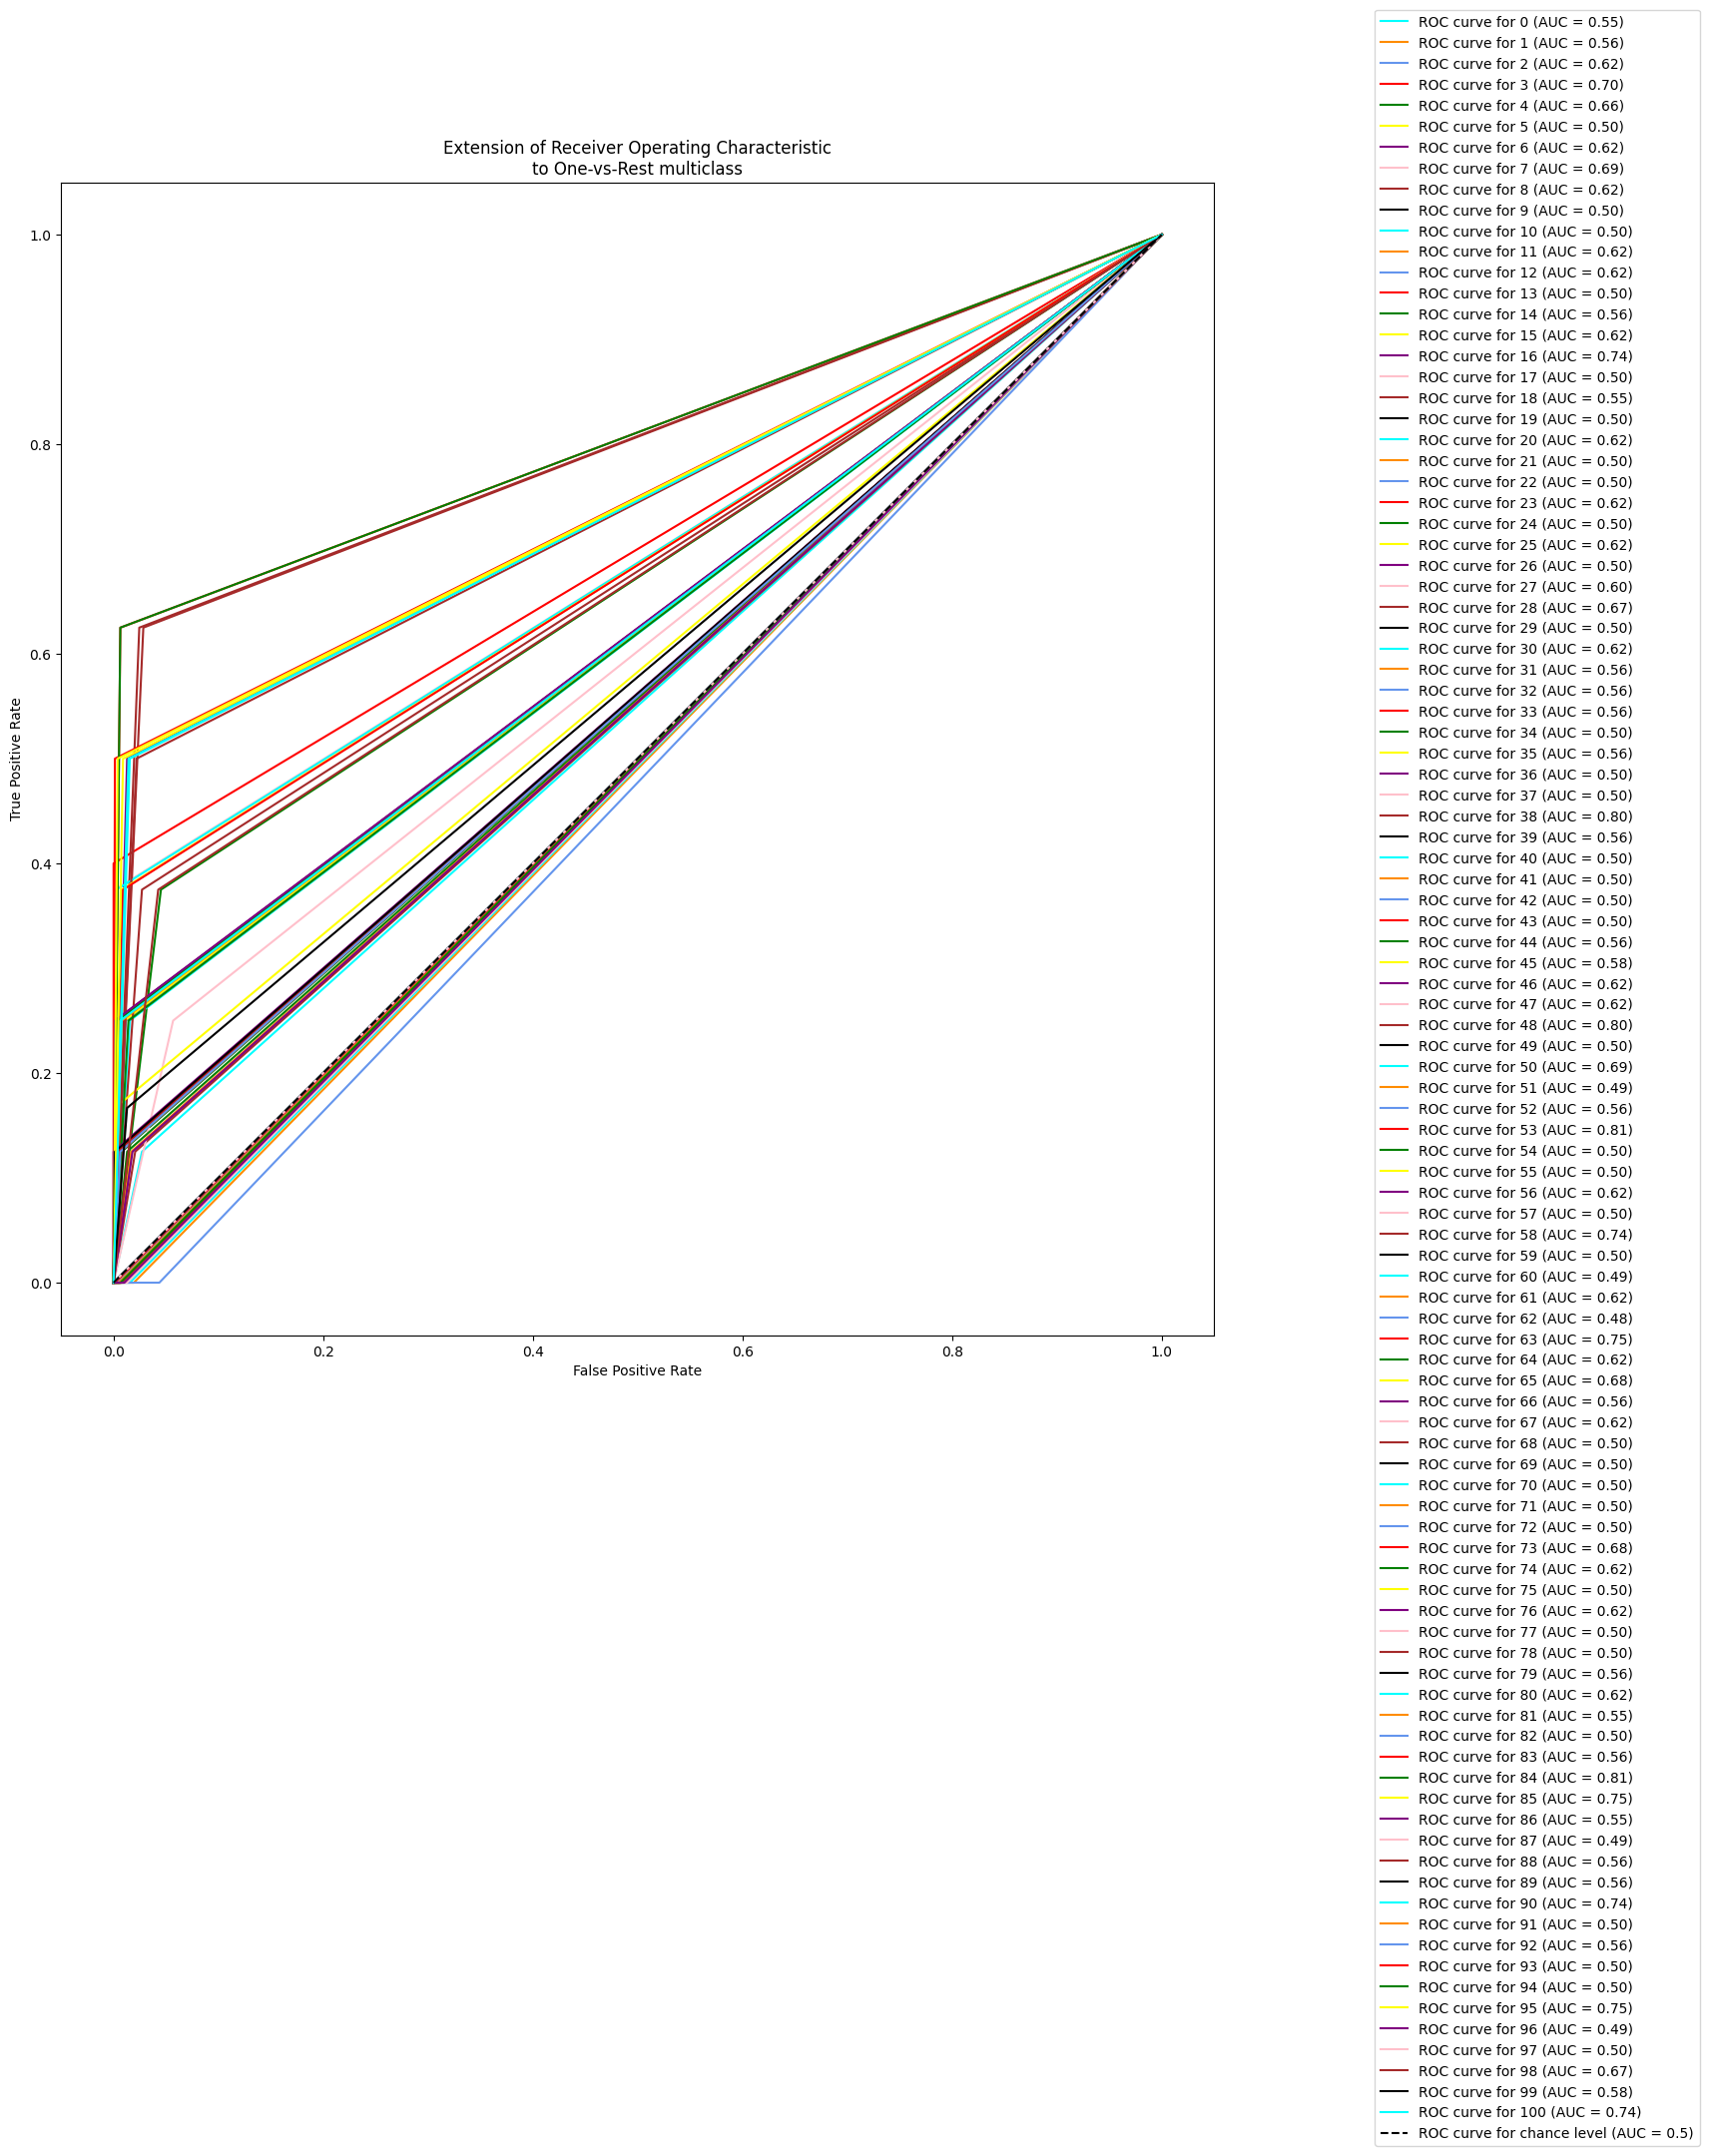

              precision    recall  f1-score   support

           0       0.05      0.12      0.07         8
           1       0.25      0.12      0.17         8
           2       0.18      0.25      0.21         8
           3       1.00      0.40      0.57         5
           4       0.08      0.38      0.13         8
           5       0.00      0.00      0.00         7
           6       0.50      0.25      0.33         8
           7       0.75      0.38      0.50         8
           8       0.20      0.25      0.22         8
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         8
          11       0.25      0.25      0.25         8
          12       0.33      0.25      0.29         8
          13       0.00      0.00      0.00         8
          14       0.14      0.12      0.13         8
          15       0.20      0.25      0.22         8
          16       0.29      0.50      0.36         8
          17       0.00    

In [9]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, output_size, num_epochs=15, multilabel=multilabel, report=True)

Training Late Fusion Model:
The number of parameters of the model are: 195983205
Epoch 1/15 - Test Accuracy: 0.0102
Epoch 2/15 - Test Accuracy: 0.0115
Epoch 3/15 - Test Accuracy: 0.0179
Epoch 4/15 - Test Accuracy: 0.0153
Epoch 5/15 - Test Accuracy: 0.0064
Epoch 6/15 - Test Accuracy: 0.0217
Epoch 7/15 - Test Accuracy: 0.0230
Epoch 8/15 - Test Accuracy: 0.0166
Epoch 9/15 - Test Accuracy: 0.0192
Epoch 10/15 - Test Accuracy: 0.0281
Epoch 11/15 - Test Accuracy: 0.0332
Epoch 12/15 - Test Accuracy: 0.0345
Epoch 13/15 - Test Accuracy: 0.0319
Epoch 14/15 - Test Accuracy: 0.0345
Epoch 15/15 - Test Accuracy: 0.0268


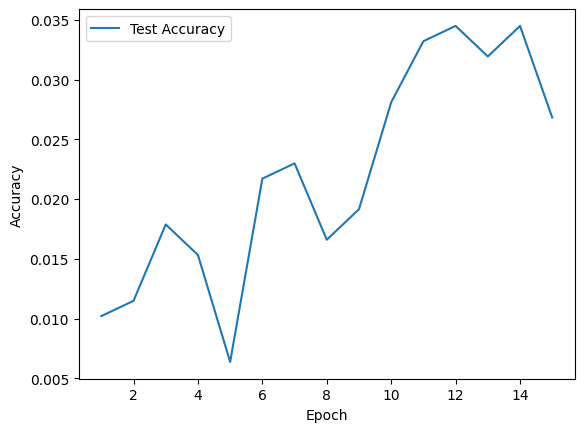

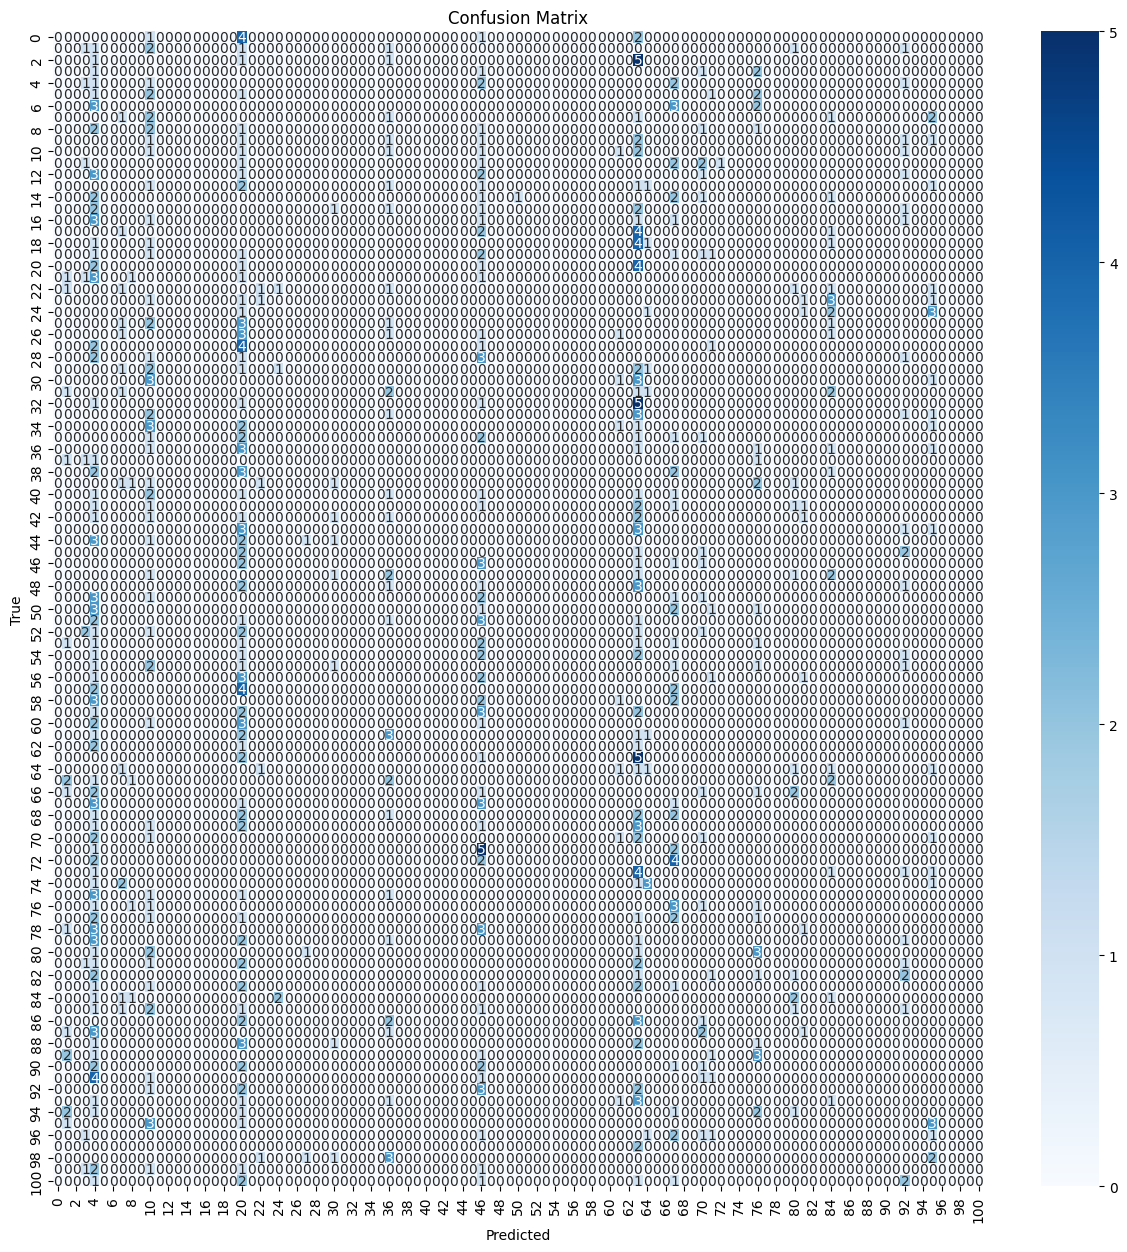

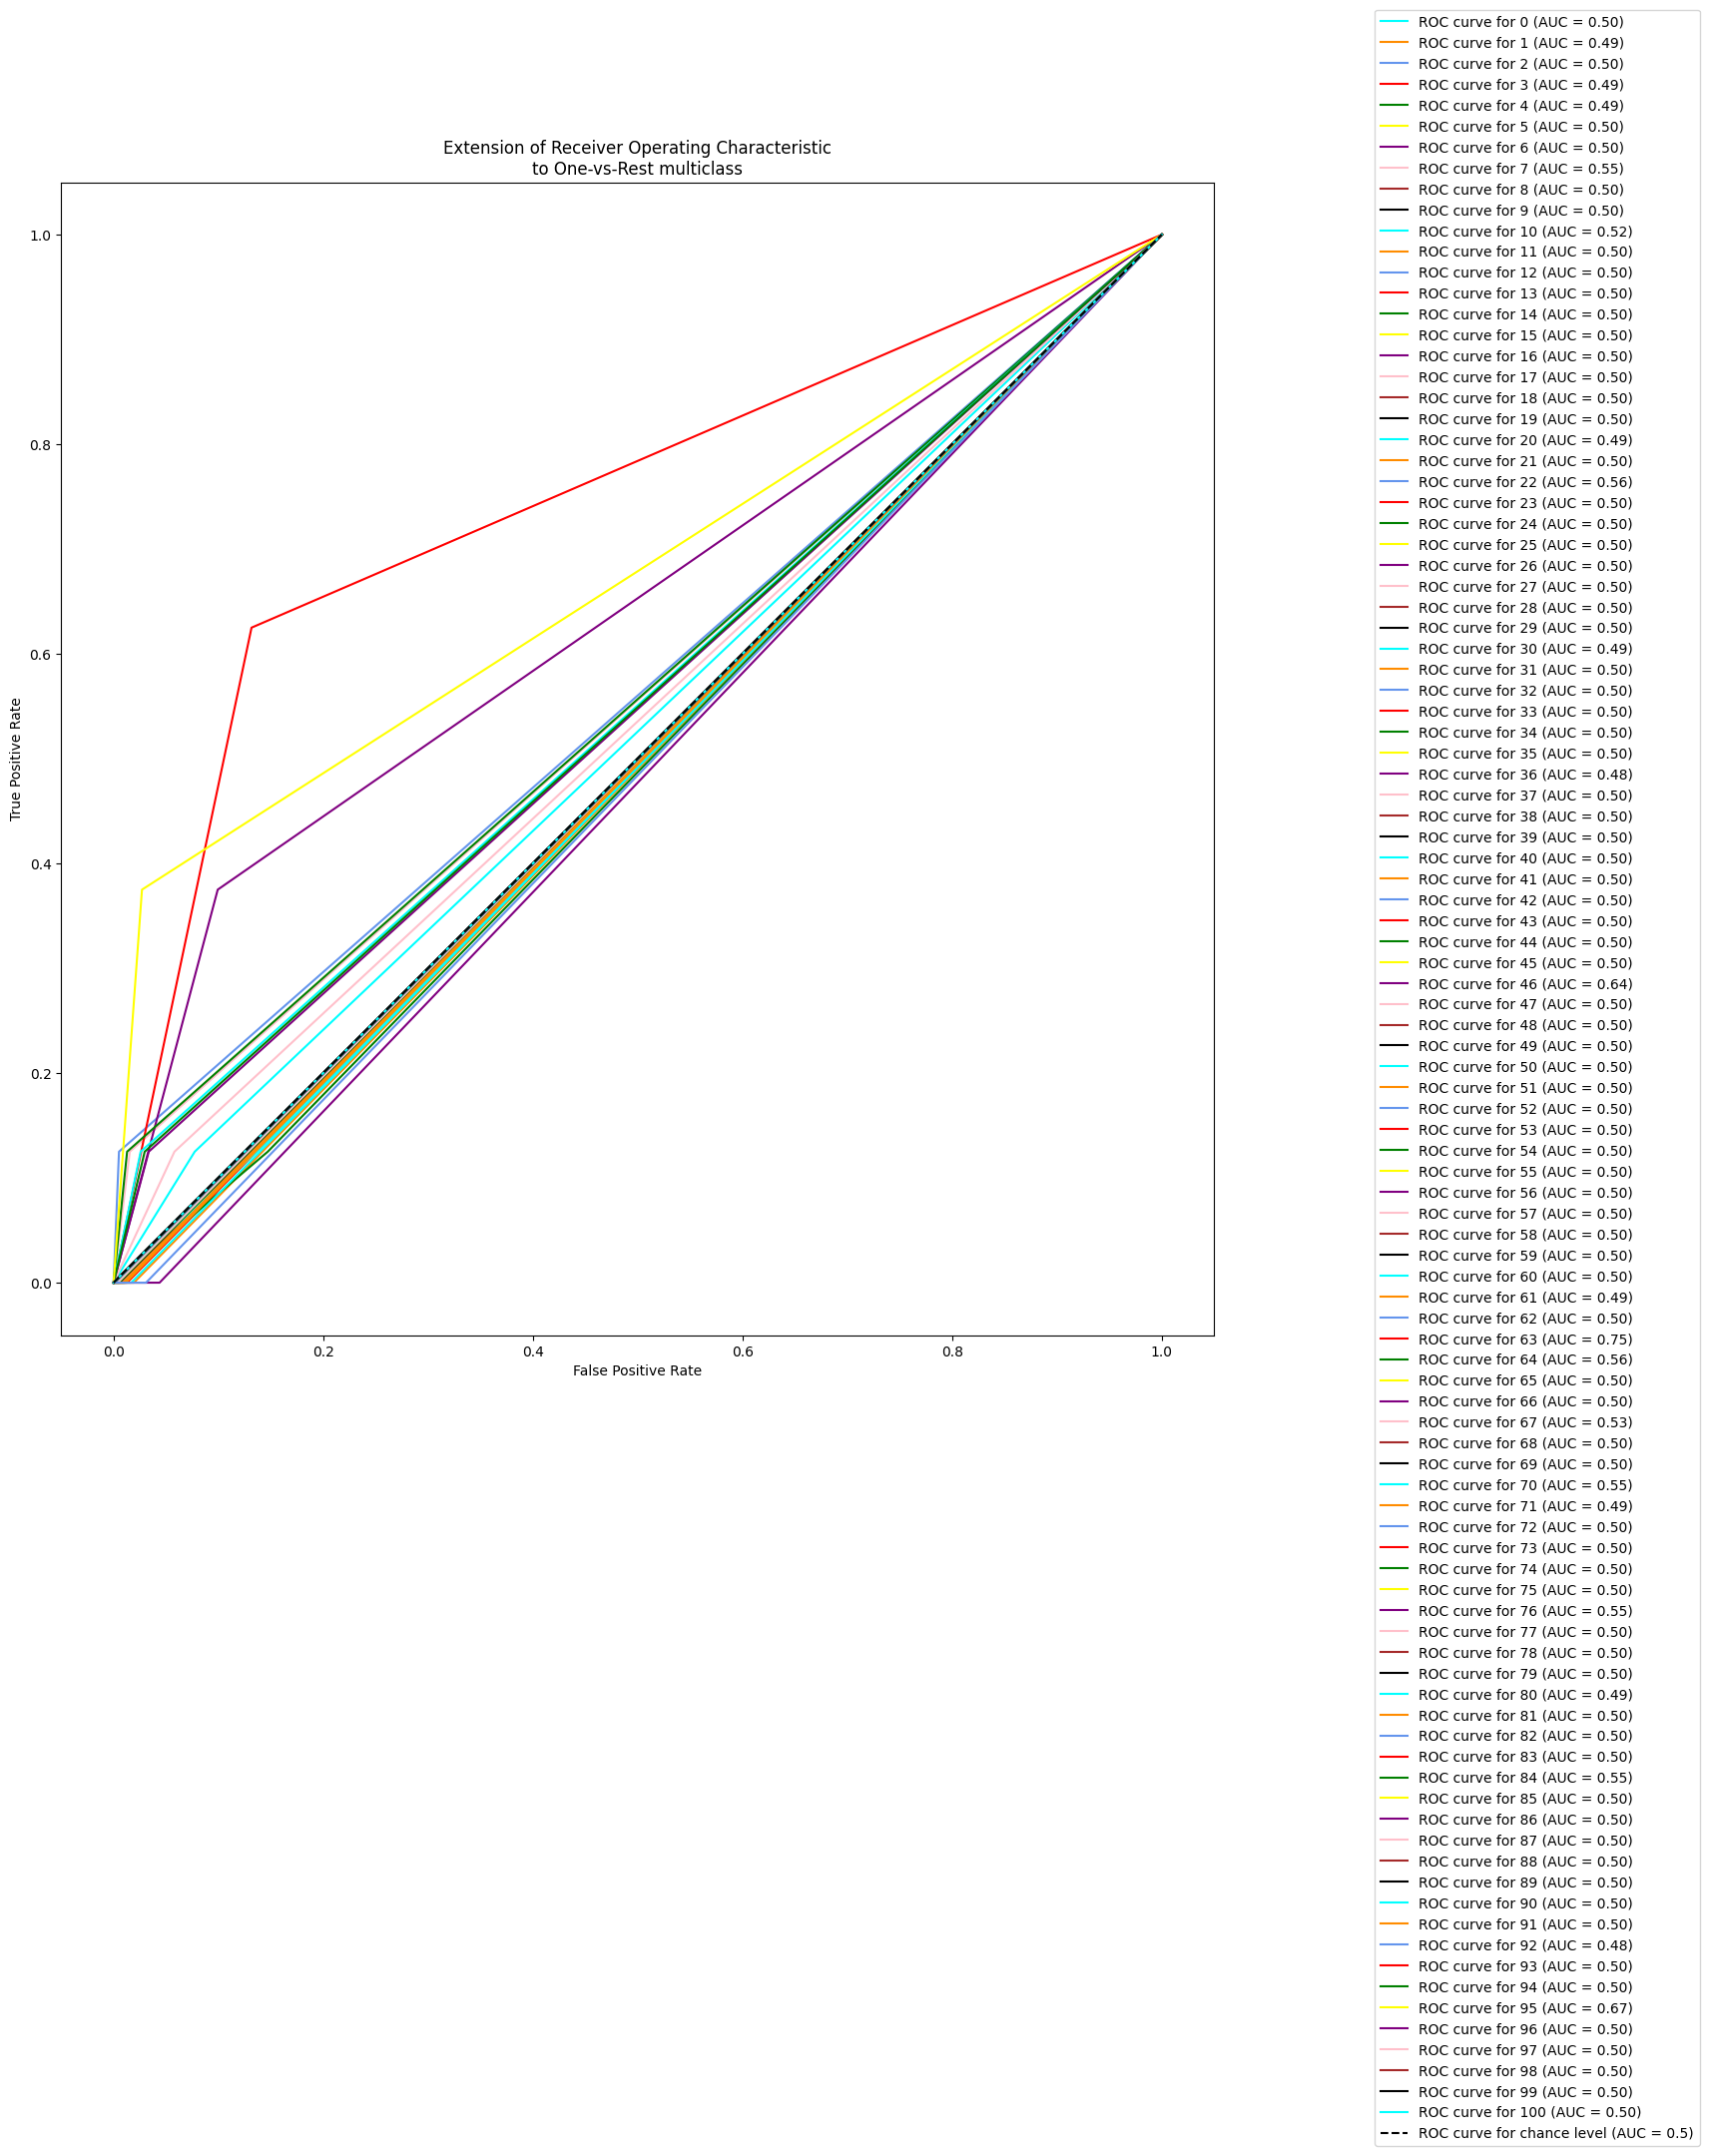

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         5
           4       0.01      0.12      0.02         8
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         8
           7       0.08      0.12      0.10         8
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         8
          10       0.02      0.12      0.03         8
          11       0.00      0.00      0.00         8
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00         8
          16       0.00      0.00      0.00         8
          17       0.00    

In [10]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, output_size, num_epochs=15, multilabel=multilabel, report=True)

In [11]:
#from src.classifiers_base import TextModel, VisionModel, EarlyFusionModel, LateFusionModel
#text_model = TextModel()
#image_model = VisionModel()
#model = EarlyFusionModel(text_model=text_model, image_model=image_model, output_size=output_size)